<a href="https://colab.research.google.com/github/lrrong2020/A/blob/main/P2010556_COMP421_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ssmresearch/hanminor/main/cars.csv')

df.head()

,origin,price,mileage,repair,headspace,trunkspace,weight,length,turningcircle,gear_ratio
0,usa,4099.0,8.8,3.0,6.25,308.0,1318.5,465.0,12.20,3.58
1,usa,4749.0,6.8,3.0,7.50,308.0,1507.5,432.5,12.20,2.53
2,usa,3799.0,8.8,3.0,7.50,336.0,1188.0,420.0,10.68,3.08
3,usa,4816.0,8.0,3.0,11.25,448.0,1462.5,490.0,12.20,2.93
4,usa,7827.0,6.0,4.0,10.00,560.0,1836.0,555.0,13.12,2.41


**1. How many records?**

In [2]:
# Count the records
num_records = len(df)
print(num_records)

74


**2. How many variables?**

In [3]:
# Count the variables/columns
num_variables = df.shape[1]
print(num_variables)

10


**3. What are the minimum, mean, and maximum values of those variables?**

In [4]:
# Descriptive statistics
descriptive_stats = df.describe().T[['min', 'mean', 'max']]
print(descriptive_stats)

                   min         mean       max
price          3291.00  6165.256757  15906.00
mileage           4.80     8.518919     16.40
repair            1.00     3.391892      5.00
headspace         3.75     7.483108     12.50
trunkspace      140.00   385.189189    644.00
weight          792.00  1358.756757   2178.00
length          355.00   469.831081    582.50
turningcircle     9.45    12.095000     15.56
gear_ratio        2.19     3.014865      3.89


**4. Determine the "label" variable, for example “origin”.**

In [5]:
label = 'origin'

**5. Normalize the file (excluding the "label" variable!). The resulting values of all variables should
be in the range from 0 to 1.**

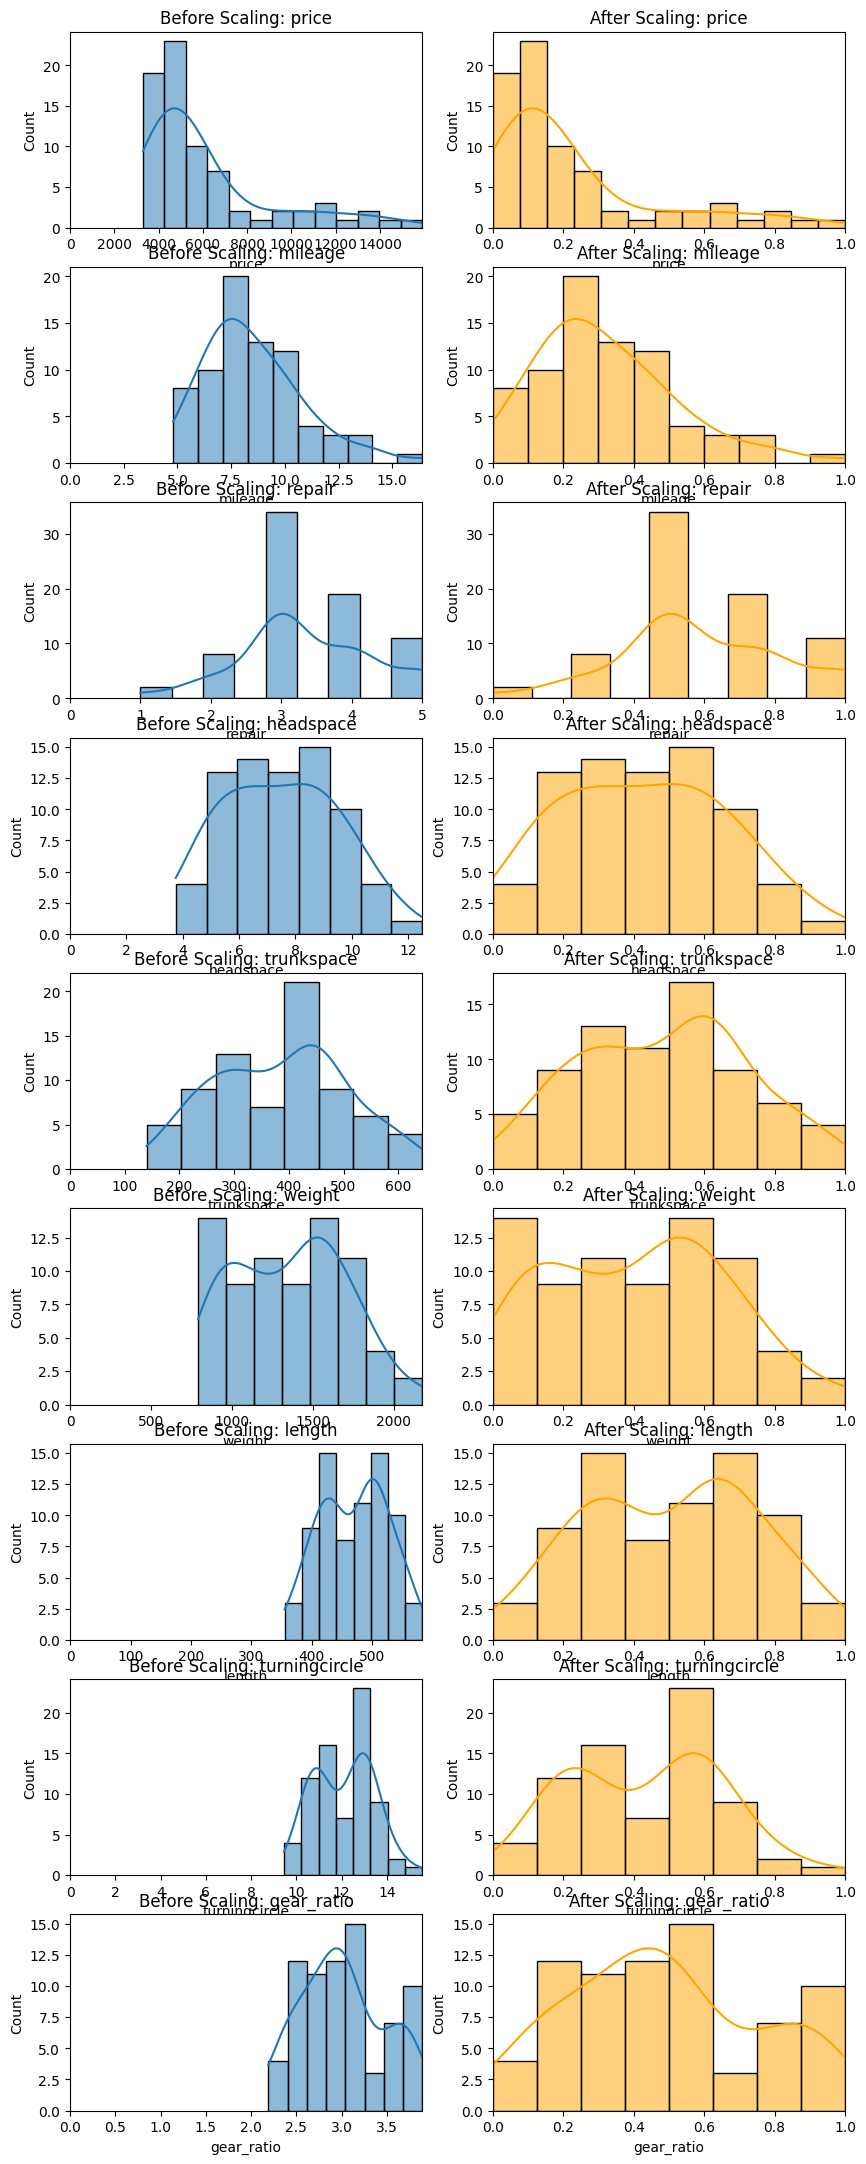

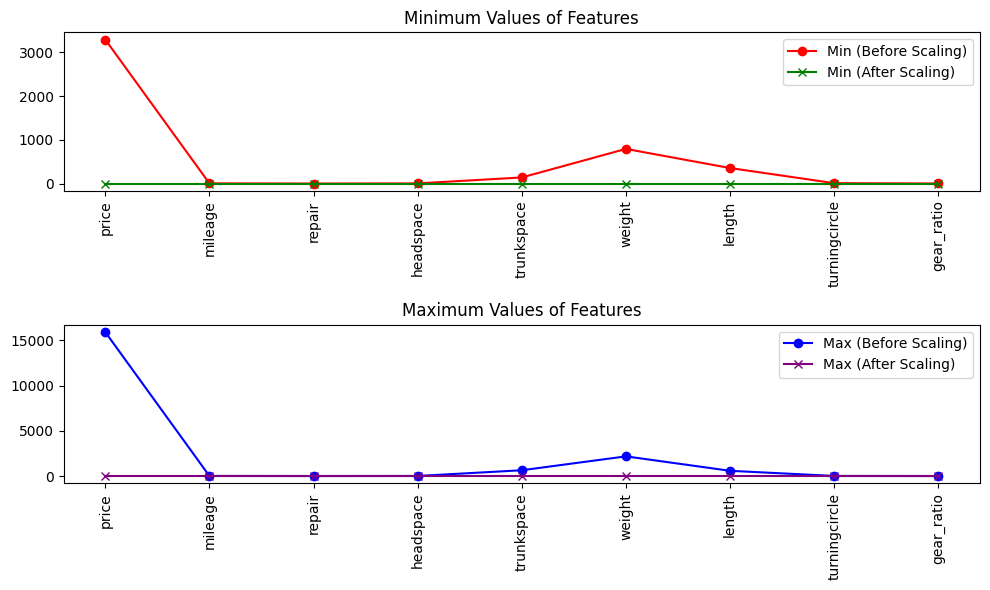

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into a pandas DataFrame called df

# Select features for normalization (excluding the 'label' column)
features = df.columns.drop(label)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Plot the minimum and maximum of each feature before and after scaling
min_before_scaling = df[features].min()
min_after_scaling = df_scaled.min()
max_before_scaling = df[features].max()
max_after_scaling = df_scaled.max()

# Now let's visualize the normalization effect on the features
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(10, len(features) * 3))

# Plotting the original and scaled data
for i, feature in enumerate(features):
    # Before scaling
    sns.histplot(df[feature], ax=axes[i][0], kde=True)
    axes[i][0].set_title(f'Before Scaling: {feature}')
    axes[i][0].set_xlim(min(df[feature].min(), df_scaled[feature].min()),
                        max(df[feature].max(), df_scaled[feature].max()))

    # After scaling
    sns.histplot(df_scaled[feature], ax=axes[i][1], kde=True, color='orange')
    axes[i][1].set_title(f'After Scaling: {feature}')
    axes[i][1].set_xlim(0, 1)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Plotting minimum values before and after scaling
ax[0].plot(features, min_before_scaling, label='Min (Before Scaling)', color='red', marker='o')
ax[0].plot(features, min_after_scaling, label='Min (After Scaling)', color='green', marker='x')
ax[0].set_title('Minimum Values of Features')
ax[0].set_xticks(range(len(features)))
ax[0].set_xticklabels(features, rotation=90)
ax[0].legend()

# Plotting maximum values before and after scaling
ax[1].plot(features, max_before_scaling, label='Max (Before Scaling)', color='blue', marker='o')
ax[1].plot(features, max_after_scaling, label='Max (After Scaling)', color='purple', marker='x')
ax[1].set_title('Maximum Values of Features')
ax[1].set_xticks(range(len(features)))
ax[1].set_xticklabels(features, rotation=90)
ax[1].legend()

plt.tight_layout()
plt.show()

# Combine the normalized features with the label
df_scaled = pd.concat([df_scaled, df[[label]]], axis=1)


**6. Create a training and test set. Use 80% of the records for the training set. The data may be
sorted by important characteristics!**

In [10]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df_scaled.drop(label, axis=1)
y = df_scaled[label]

# # # For multiple columns, you can use a list of column names.
# sorted_df = df_scaled.sort_values(by='trunkspace', ascending=True)

# # Define the features and the target after sorting
# X_sorted = sorted_df.drop(label, axis=1)
# y_sorted = sorted_df[label]


# Split the sorted data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**7. Determine k for the kNN method.**

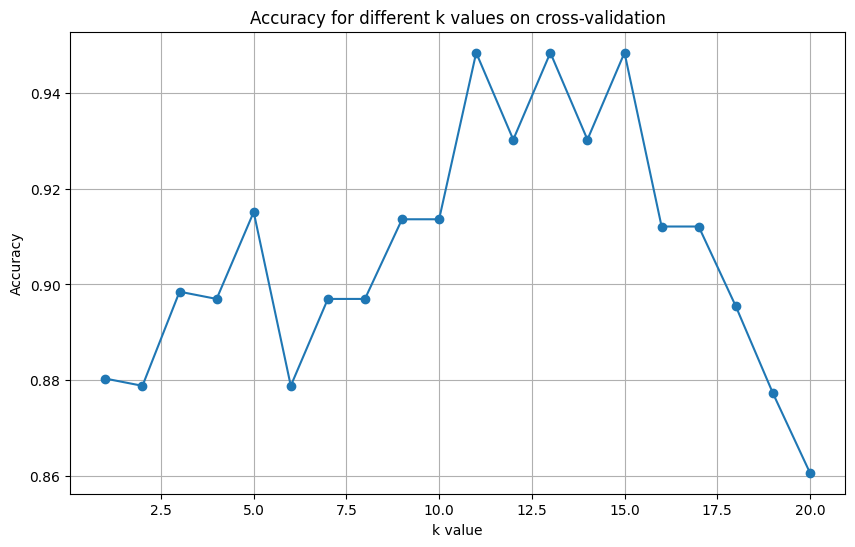

best k value:  11


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Try K from 1 to 20
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values on cross-validation')
plt.grid(True)
plt.show()

# Determine the best k value
best_k = k_values[cv_scores.index(max(cv_scores))]
print("best k value: ", best_k)


**8. Train the model, and evaluate the model: how good are the predictions in the test set?**

Confusion Matrix:
[[ 3  1]
 [ 0 11]]

Classification Report:
              precision    recall  f1-score   support

       other       1.00      0.75      0.86         4
         usa       0.92      1.00      0.96        11

    accuracy                           0.93        15
   macro avg       0.96      0.88      0.91        15
weighted avg       0.94      0.93      0.93        15



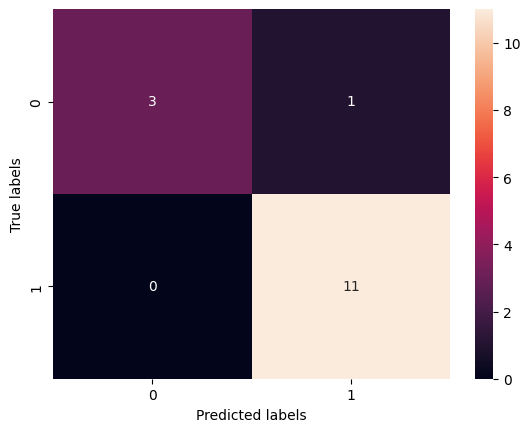

In [13]:
# Train the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Predictions
y_pred = knn.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

import seaborn as sns

# Confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


**9. What are possible improvements in the model?**

Let's try more K values. Since the dataset is limted, the first improvement suggested is to fetch more data to increase the models' generalization capability.

Data augmentation may be applied as well.

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have a dataset with X features and y labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sm = SMOTE(random_state=42)
X_train_augmented, y_train_augmented = sm.fit_resample(X_train, y_train)

# Now you can use X_train_augmented and y_train_augmented for a more balanced training set


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
V

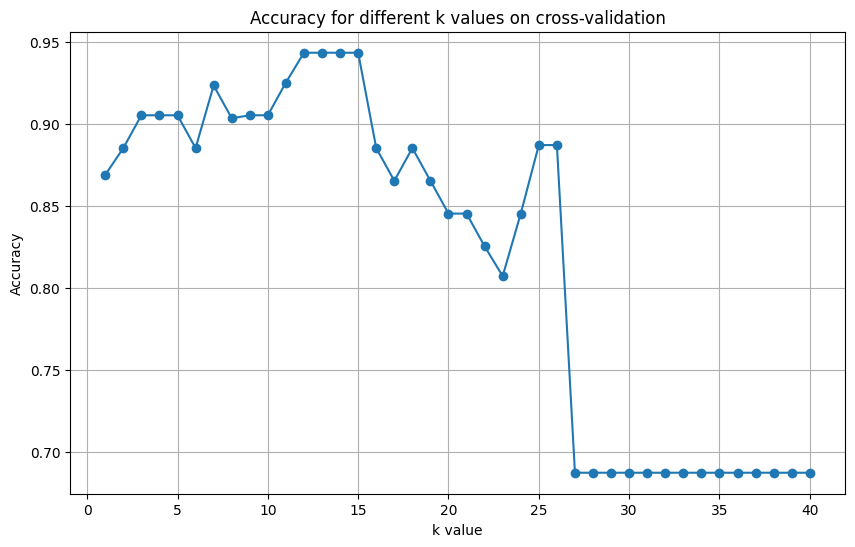

best k value:  12


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Try K from 1 to 50
k_values = range(1, 51)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values on cross-validation')
plt.grid(True)
plt.show()

# Determine the best k value
best_k = k_values[cv_scores.index(max(cv_scores))]
print("best k value: ", best_k)


Confusion Matrix:
[[ 6  0]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

       other       1.00      1.00      1.00         6
         usa       1.00      1.00      1.00        17

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



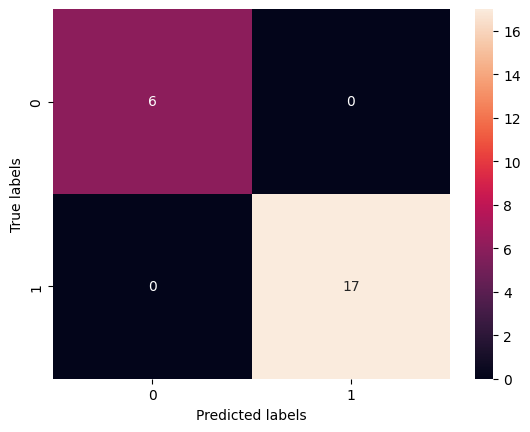

In [18]:
# Train the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Predictions
y_pred = knn.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

import seaborn as sns

# Confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


More data, more accurate result.